In [14]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from matplotlib import pyplot
%matplotlib inline
from math import sqrt
import datetime
from datetime import timedelta
import numpy as np 

import datetime as dt
import statsmodels.api as sm
import statsmodels.tsa.api as tsa


#support warnings
import warnings
warnings.filterwarnings("ignore")

Load DataSet

In [15]:
data = read_csv('data_penjualan.csv', header=0, index_col=0, parse_dates=True, sep=',')
series = data['Passengers']
data

,Passengers
date,
2018-01-02,152
2018-01-02,627
2018-01-02,74
2018-01-02,314
2018-01-03,4161
...,...
2021-12-28,111
2021-12-28,63
2021-12-28,50


In [16]:
data.info

<bound method DataFrame.info of             Passengers
date                  
2018-01-02         152
2018-01-02         627
2018-01-02          74
2018-01-02         314
2018-01-03        4161
...                ...
2021-12-28         111
2021-12-28          63
2021-12-28          50
2021-12-28          18
2021-12-29        1498

[4162 rows x 1 columns]>

<AxesSubplot: xlabel='date'>

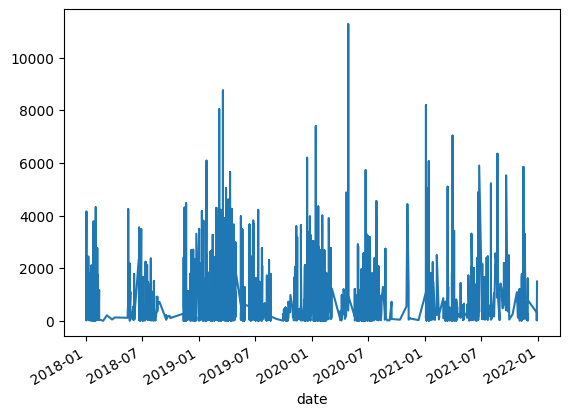

In [17]:
series.plot()

Split DataSet

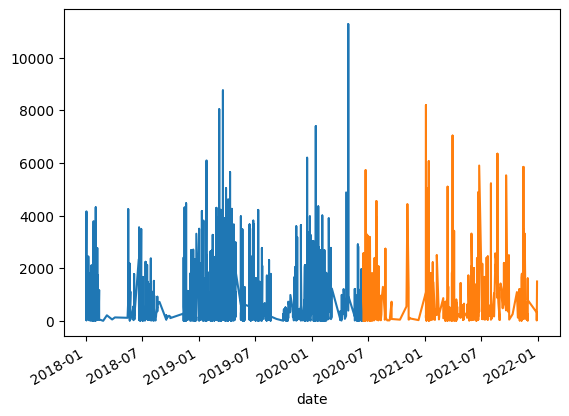

In [18]:
train, test =series[:3330], series[3330:] #membagi data training dan data test 80%
n = len(series)
n_train = len(train)
n_test = len(test)

#plot mengilustrasikan perbedaan train/test set
fig, ax = pyplot.subplots()
train.plot(ax=ax);
test.plot(ax=ax);

In [19]:
train.tail()

date
2020-06-16    1395
2020-06-16     168
2020-06-16      50
2020-06-16     514
2020-06-16     782
Name: Passengers, dtype: int64

In [20]:
test.head()

date
2020-06-16       9
2020-06-16      40
2020-06-16    1604
2020-06-16     129
2020-06-16     307
Name: Passengers, dtype: int64

Create Model

In [21]:
import pmdarima as pm

def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries, start_p=2, start_q=0, test="adf", seasonal=True, trace=True, stepwise=False) #sesasonal itu data musiman yang naik turun jika ada maka true lainnya false
    return automodel

In [22]:
#mencari kombinasi parameter dari librari 
#Cari AIC yang paling kecil

automodel = arimamodel(train)
print(automodel.summary())

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=54177.647, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=53826.847, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=53801.587, Time=0.23 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=53793.156, Time=0.29 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=53784.162, Time=0.38 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=53780.041, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=53776.143, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=53777.746, Time=0.23 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=53776.824, Time=0.35 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=53774.109, Time=0.51 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=53771.042, Time=0.58 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=53777.812, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=53779.584, Time=0.36 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=53772.537, Time=0.60 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=53772.693, Time=2.36

Best model:  ARIMA(4,0,0)

Forecasting

In [23]:
test.shape

(832,)

In [24]:
predictions_arima = automodel.predict(n_periods=test.shape[0])
predictions_arima

3330    599.770494
3331    554.706820
3332    567.057248
3333    571.060077
3334    564.902563
           ...    
4157    560.609360
4158    560.609360
4159    560.609360
4160    560.609360
4161    560.609360
Length: 832, dtype: float64

Visualisasi

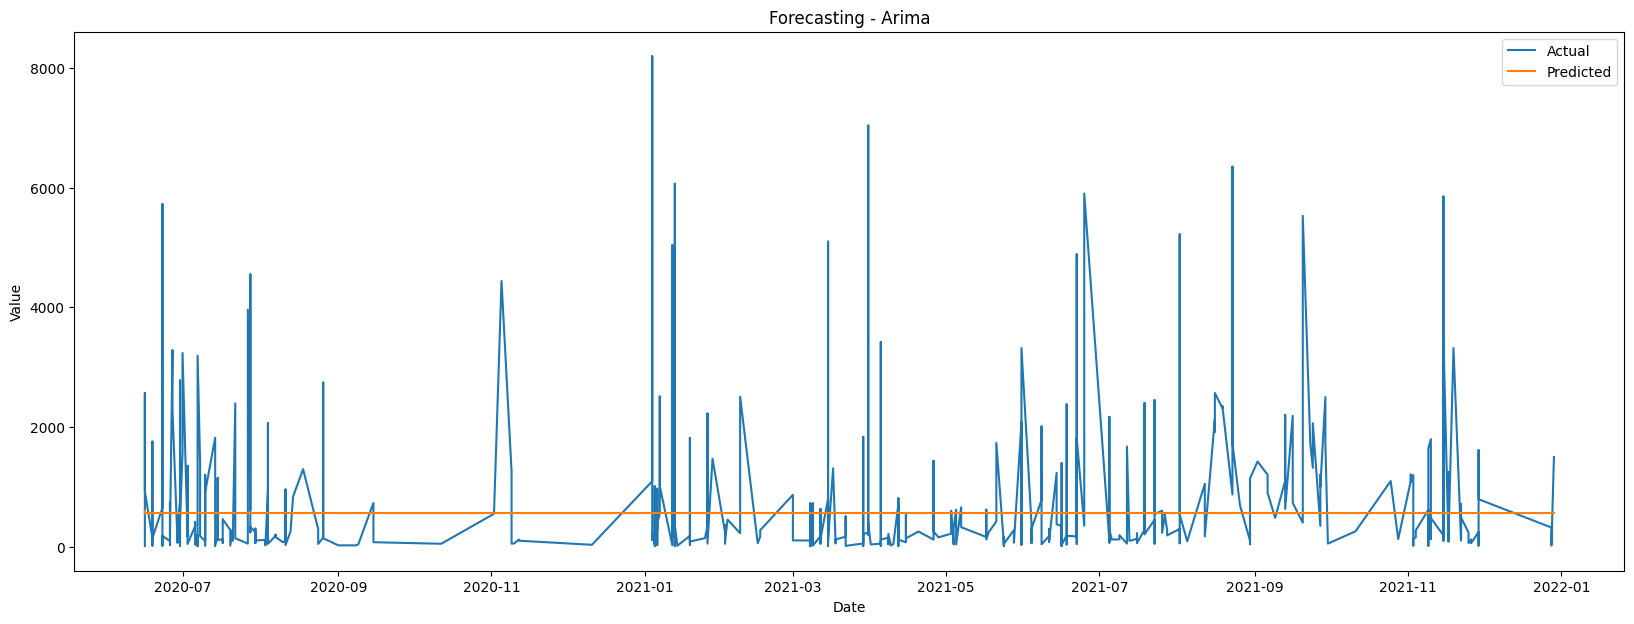

In [25]:
pyplot.figure(figsize=(20,7));
pyplot.plot(test.index, test, label='Actual');
pyplot.plot(test.index, predictions_arima, label='Predicted');
pyplot.title('Forecasting - Arima')
pyplot.xlabel('Date')
pyplot.ylabel('Value')
pyplot.legend();

Evaluate

In [26]:
rmse = sqrt(mean_squared_error(test, predictions_arima))
print('Test RSME : %.3f' % rmse)

Test RSME : 1081.137


Improvement Data

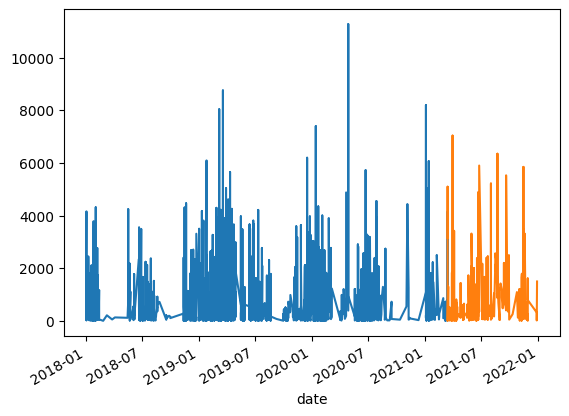

In [27]:
train, test =series[:3746], series[3746:]
n = len(series)
n_train = len(train)
n_test = len(test)

#plot mengilustrasikan perbedaan train/test set
fig, ax = pyplot.subplots()
train.plot(ax=ax);
test.plot(ax=ax);

In [28]:
automodel = arimamodel(train)
print(automodel.summary())

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=61118.470, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=60761.392, Time=0.23 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=60722.970, Time=0.83 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=60727.993, Time=0.32 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=60720.442, Time=0.45 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=60715.857, Time=0.47 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=60709.248, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=60710.862, Time=0.24 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=60711.294, Time=0.33 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=60710.852, Time=0.54 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=60708.125, Time=0.53 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=60710.869, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=60712.743, Time=0.44 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=60709.437, Time=0.66 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=60709.386, Time=2.40

In [29]:
predictions_arima = automodel.predict(n_periods=test.shape[0])
predictions_arima

3746    413.167029
3747    500.467126
3748    530.701159
3749    536.700595
3750    547.805961
           ...    
4157    562.043156
4158    562.043156
4159    562.043156
4160    562.043156
4161    562.043156
Length: 416, dtype: float64

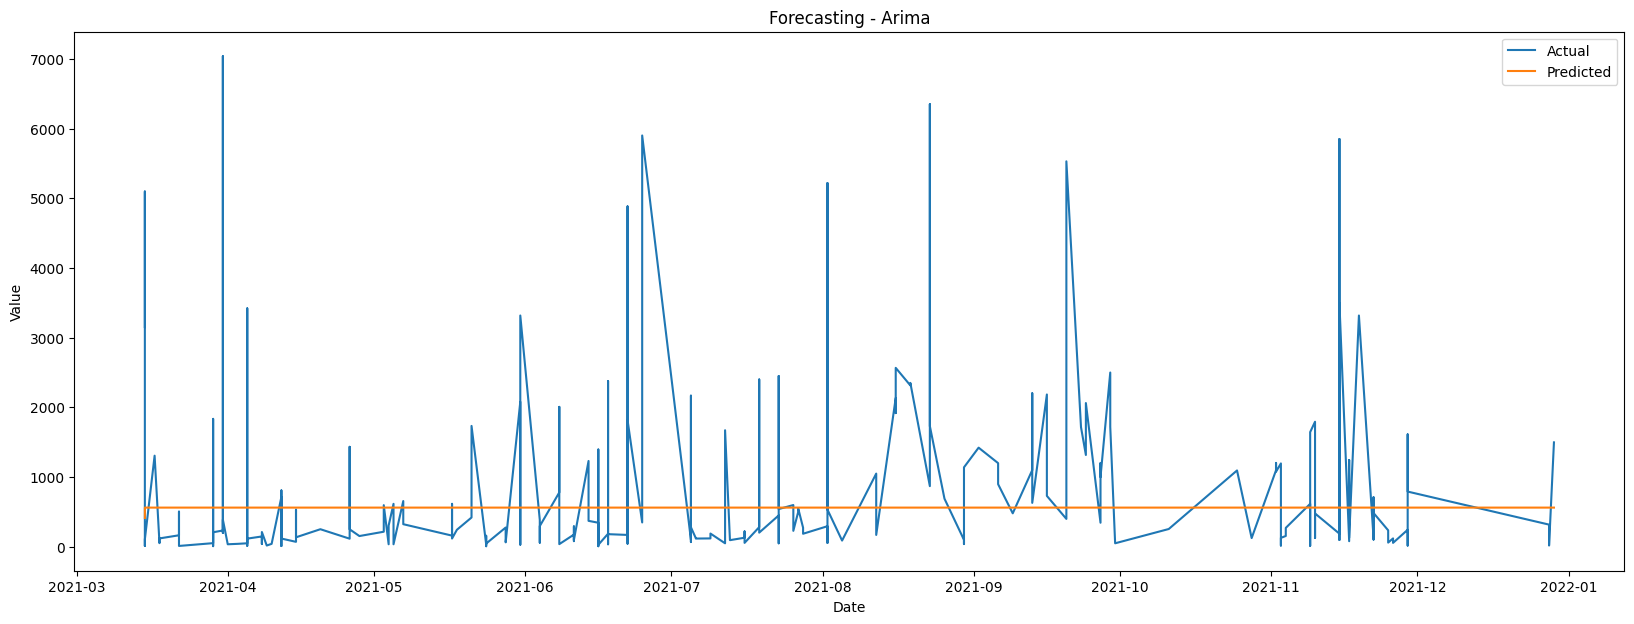

In [30]:
pyplot.figure(figsize=(20,7));
pyplot.plot(test.index, test, label='Actual');
pyplot.plot(test.index, predictions_arima, label='Predicted');
pyplot.title('Forecasting - Arima')
pyplot.xlabel('Date')
pyplot.ylabel('Value')
pyplot.legend();

In [31]:
rmse = sqrt(mean_squared_error(test, predictions_arima))
print('Test RSME : %.3f' % rmse)

Test RSME : 1170.655


#==========================================CODINGAN LAINNYA========================================================================

In [ ]:
import pandas as pd
import glob
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import pacf
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv('data_penjualan.csv', parse_dates=['date'], index_col='date', header=0,sep=",")
data.head()

In [ ]:
data.plot(figsize=(15,5))

In [ ]:
TEST_SIZE = 36
train, test = data.iloc[:-TEST_SIZE], data.iloc[-TEST_SIZE:]
x_train, x_test = np.array(range(train.shape[0])), np.array(range(train.shape[0], data.shape[0]))
train.shape, x_train.shape, test.shape, x_test.shape

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train)
ax.plot(x_test, test)

In [ ]:
from pmdarima.arima import auto_arima

model = auto_arima(train, start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=1,          
                      seasonal=False,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

In [ ]:
model.summary()

In [ ]:
# Forecast

prediction, confint = model.predict(n_periods=TEST_SIZE, return_conf_int=True)

prediction

In [ ]:
cf= pd.DataFrame(confint)

In [ ]:

prediction_series = pd.Series(prediction,index=test.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.plot(data.Passengers)
ax.plot(prediction_series)
ax.fill_between(prediction_series.index,
                cf[0],
                cf[1],color='grey',alpha=.3)

In [ ]:
model.plot_diagnostics(figsize=(14,10))
plt.show()

In [ ]:
def calcsmape(actual, forecast):
    return 1/len(actual) * np.sum(2 * np.abs(forecast-actual) / (np.abs(actual) + np.abs(forecast)))

In [ ]:
smape=calcsmape(test.Passengers, prediction_series)
smape

In [ ]:
TEST_SIZE = 12
train, test = data.iloc[:-TEST_SIZE], data.iloc[-TEST_SIZE:]
x_train, x_test = np.array(range(train.shape[0])), np.array(range(train.shape[0], data.shape[0]))
train.shape, x_train.shape, test.shape, x_test.shape

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train)
ax.plot(x_test, test)

In [ ]:
model = auto_arima(train, start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=1,          
                      seasonal=False,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

In [ ]:
model.summary()

In [ ]:
prediction, confint = model.predict(n_periods=TEST_SIZE, return_conf_int=True)

predictionprediction, confint = model.predict(n_periods=TEST_SIZE, return_conf_int=True)

prediction

In [ ]:
cf= pd.DataFrame(confint)

In [ ]:
prediction_series = pd.Series(prediction,index=test.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(data.Passengers)
ax.plot(prediction_series)
ax.fill_between(prediction_series.index,
                cf[0],
                cf[1],color='grey',alpha=.3)

In [ ]:
model.plot_diagnostics(figsize=(14,10))
plt.show()

In [ ]:
smape=calcsmape(test.Passengers,prediction_series)
smape